# Week 4_Day 1: Unsupervised ML 

### Imports and Setup

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature Selection for Clustering

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

### Feature Scaling

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means : Choosing K(Elbow Method)

In [10]:
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\saifu_y\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saifu_y\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saifu_y\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saifu_y\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

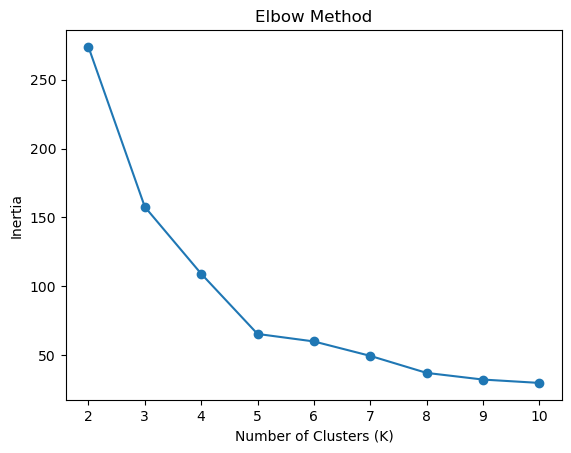

In [11]:
# plotting elbow method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Train Final K-Means Model

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

c:\Users\saifu_y\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Evaluate with Silhoutte Score

In [14]:
sill_score = silhouette_score(X_scaled, clusters)
print(sill_score)

0.5546571631111091


### PCA Visualization

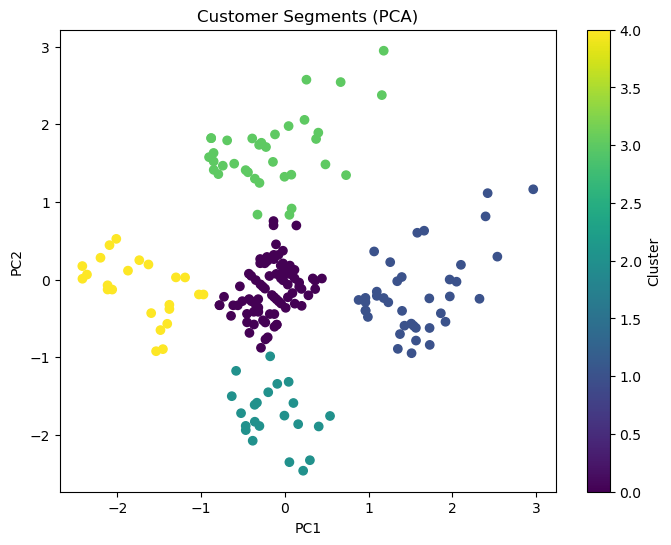

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments (PCA)")
plt.colorbar(label="Cluster")
plt.show()

### DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_clusters

In [18]:
set(db_clusters)

{np.int64(0)}

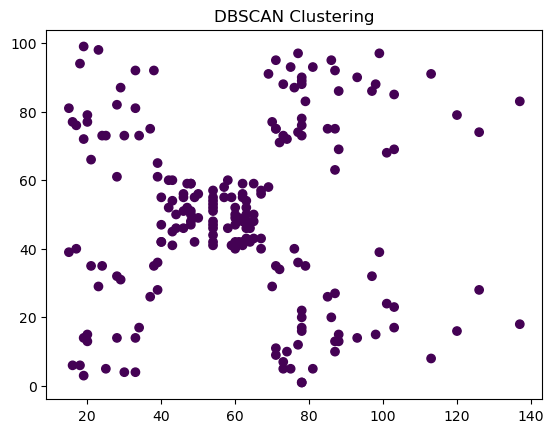

In [19]:
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=db_clusters
)
plt.title("DBSCAN Clustering")
plt.show()